Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3872 - val_loss: 0.1921
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1820 - val_loss: 0.1536
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1494 - val_loss: 0.1340
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1320 - val_loss: 0.1213
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1207 - val_loss: 0.1127
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1128 - val_loss: 0.1070
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1073 - val_loss: 0.1027
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1032 - val_loss: 0.0995
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1002 - val_loss: 0.0972
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0980 - val_loss: 0.0956
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0966 - val_loss: 0.0946
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

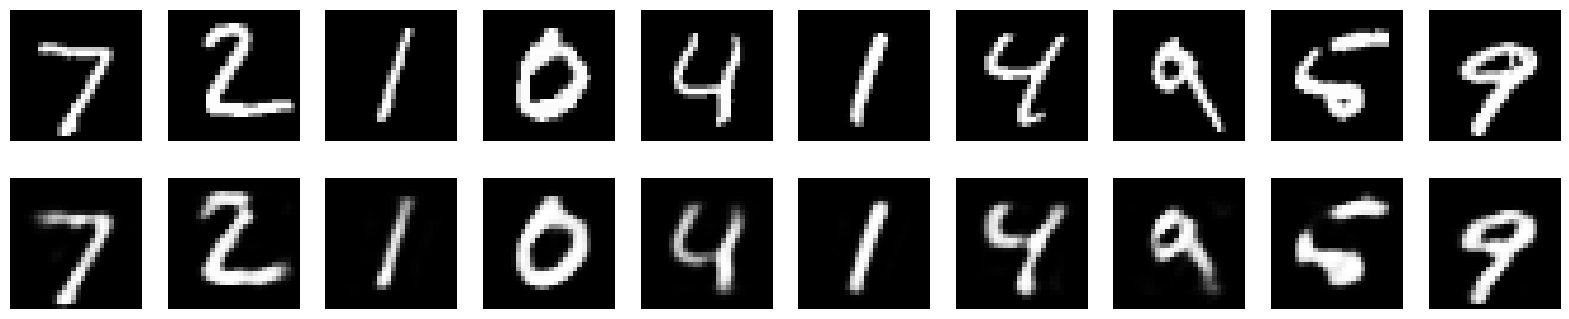

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Define the Autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Generate reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# Display original vs reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1654 - val_loss: 0.1321
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1318 - val_loss: 0.1280
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1283 - val_loss: 0.1262
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1267 - val_loss: 0.1252
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1257 - val_loss: 0.1243
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1249 - val_loss: 0.1240
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1242 - val_loss: 0.1235
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1243 - val_loss: 0.1233
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1237 - val_loss: 0.1231
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1235 - val_loss: 0.1231
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1238 - val_loss: 0.1229
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

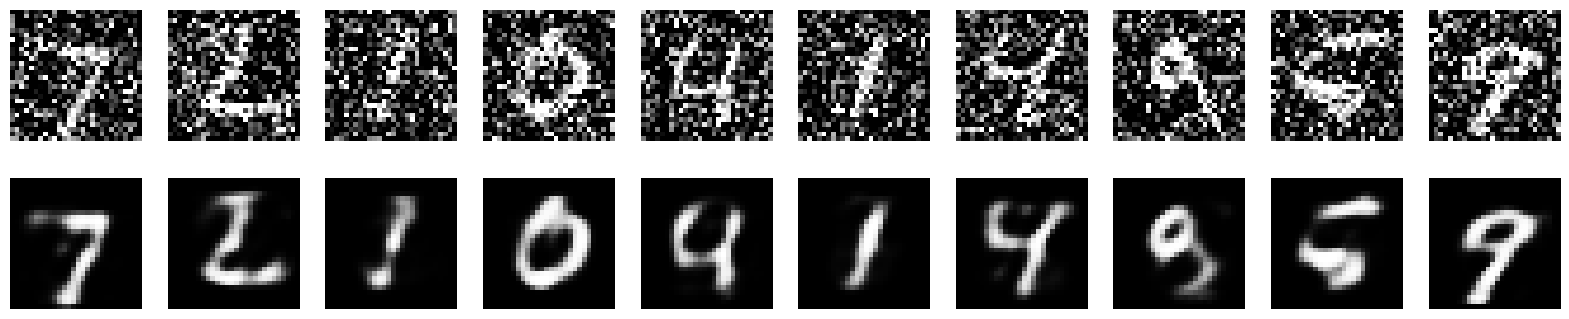

In [3]:
# Add Gaussian noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the denoising autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# Generate denoised images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display noisy vs denoised images
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()


In [9]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.preprocessing.text as text

# Sample text (Instead of a file)
text_data = """To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles."""

# Convert text to lowercase
text_data = text_data.lower()

# Create character mappings
chars = sorted(set(text_data))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}

# Prepare data sequences
sequence_length = 40
sequences = []
next_chars = []

for i in range(len(text_data) - sequence_length):
    sequences.append([char_to_index[char] for char in text_data[i:i+sequence_length]])
    next_chars.append(char_to_index[text_data[i+sequence_length]])

x = np.array(sequences)
y = np.array(next_chars)

print("Dataset Loaded Successfully!")


Dataset Loaded Successfully!


In [11]:
import os
print(os.getcwd())  # Prints the current directory
print(os.listdir())  # Lists all files in the directory

/Users/damodar16613
['.Rhistory', 'Untitled7.ipynb', '.config', 'Music', 'Damodar_700755572.ipynb', '.condarc', 'Untitled5.ipynb', 'Untitled1.ipynb', '.DS_Store', '.thumbnails', '.CFUserTextEncoding', '.xonshrc', 'anaconda_projects', 'Untitled3.ipynb', 'Untitled.ipynb', '.zshrc', 'Untitled4.ipynb', '.local', 'Untitled6.ipynb', 'Pictures', 'inclass7.ipynb', 'home assignment 3.ipynb', '.zsh_history', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', '.cups', 'Public', 'logs', '.tcshrc', '.anaconda', 'Untitled8.ipynb', 'Movies', 'Applications', '.Trash', '.ipynb_checkpoints', '.jupyter', '.keras', 'Documents', '.anydesk', '.bash_profile', 'Downloads', '.continuum', 'Untitled9.ipynb', '.zsh_sessions', '.conda', '.fxx.log']


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
import numpy as np

# Define the LSTM model
model = Sequential([
    Embedding(len(chars), 50, input_length=sequence_length),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dense(len(chars), activation="softmax")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")

# Train the model
model.fit(x, y, epochs=20, batch_size=64)

# Function to generate text
def generate_text(seed, length, temperature=1.0):
    result = seed
    for _ in range(length):
        x_input = np.array([[char_to_index[char] for char in seed[-sequence_length:]]])
        preds = model.predict(x_input)[0]
        preds = np.log(preds) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        next_index = np.random.choice(len(chars), p=preds)
        next_char = index_to_char[next_index]
        seed += next_char
        result += next_char
    return result

# Generate text using the trained model
print(generate_text("to be, or not to be, that is ", 100, temperature=0.8))


Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2172
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.1884
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3.0835
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.9407
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.8595
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.9215
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.8736
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.8712
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.8525
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.8635
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.8797
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.9091
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.8536
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.8474
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.8348
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/

In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.metrics import classification_report, confusion_matrix

# Load IMDB dataset
max_features = 5000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Preprocess data
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build LSTM model
model = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    SpatialDropout1D(0.2),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate and generate reports
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 360s 920ms/step - accuracy: 0.6775 - loss: 0.5766 - val_accuracy: 0.8107 - val_loss: 0.4296
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 339s 868ms/step - accuracy: 0.8367 - loss: 0.3787 - val_accuracy: 0.7377 - val_loss: 0.5156
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 363s 928ms/step - accuracy: 0.8457 - loss: 0.3610 - val_accuracy: 0.8391 - val_loss: 0.3739
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 387s 990ms/step - accuracy: 0.8788 - loss: 0.2965 - val_accuracy: 0.8674 - val_loss: 0.3306
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 377s 966ms/step - accuracy: 0.8681 - loss: 0.3211 - val_accuracy: 0.8584 - val_loss: 0.3440
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step
[[10722  1778]
 [ 1761 10739]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     12500
           1       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
  